In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv('D:\PowerBI practise data\Flights_Dataset.csv')

In [4]:
dataset.head()
#DAYS_LEFT REPRESENTS NUMBER OF DAYS BETWEEN TICKET BOOKED DATE AND FLIGHT DATE

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [20]:
dataset = dataset.drop(columns='Unnamed: 0', axis=1)   #REMOVING COLOUMN UNNAMED AS IT'S JUST SERAIL NUM AND OF NO USE

In [25]:
dataset.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [23]:
#CHECK FOR NULL/MISSING VALUES
dataset.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [24]:
# WITH ABLOVE DESCRIPTION WE CAN OBSERVE THAT DATA IS CLEAN AND THERE ARE NO NULL VALUES

In [31]:
categorical_data = [i for i in dataset.columns if dataset[i].dtype =='O']
numerical_data = [i for i in dataset.columns if dataset[i].dtype != "O"]

In [33]:
print("Categorical data are columns ",list(categorical_data))
print("Numerical data are columns",list(numerical_data))

Categorical data are columns  ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
Numerical data are columns ['duration', 'days_left', 'price']


# BARPLOT OF EVERY CATEGORICAL DATA AGAINST PRICE

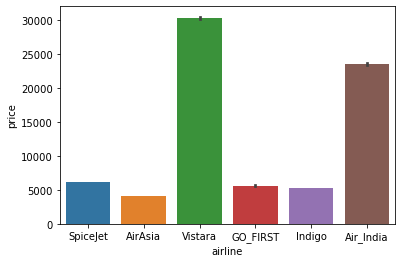

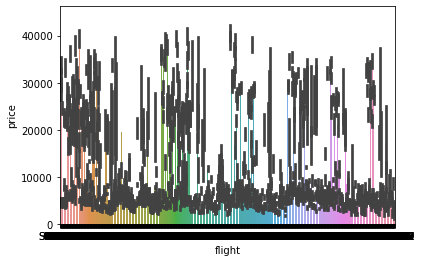

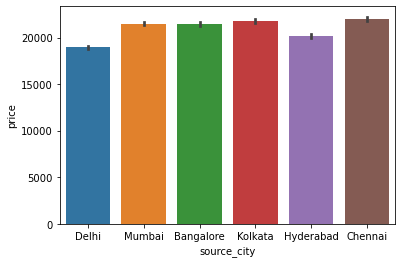

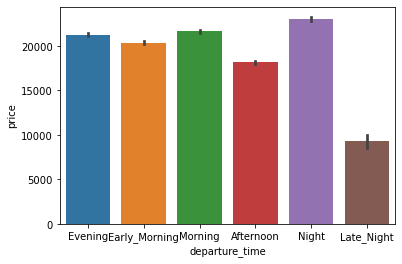

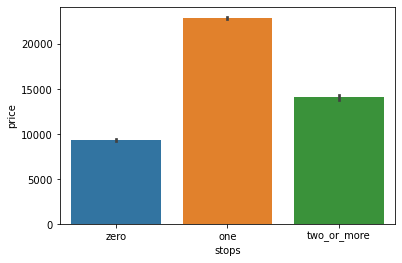

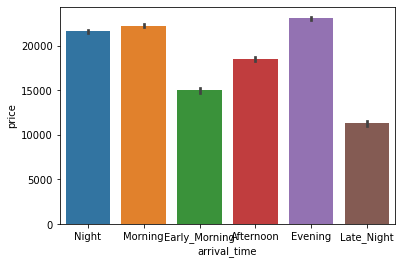

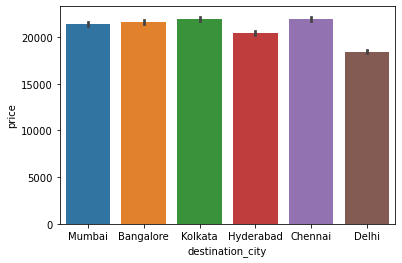

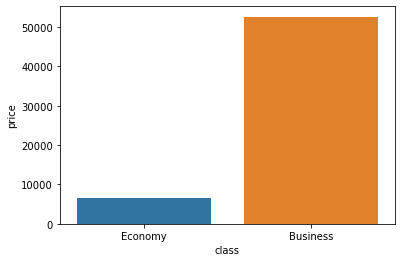

In [36]:
for i in categorical_data:
    plt.figure()
    sns.barplot(x=dataset[i],y=dataset['price'])

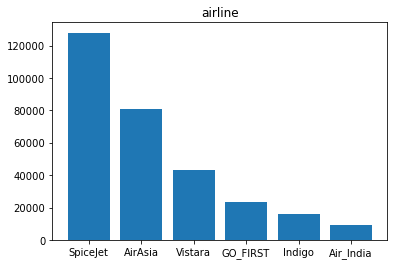

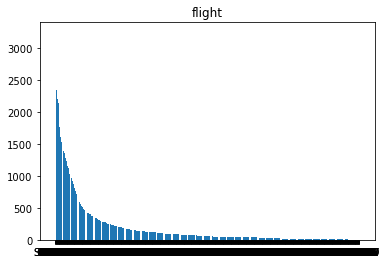

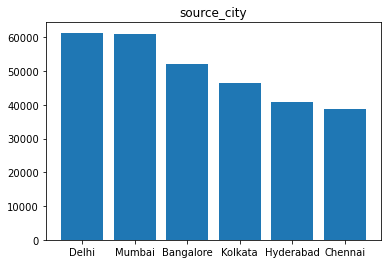

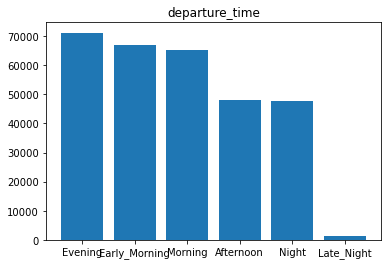

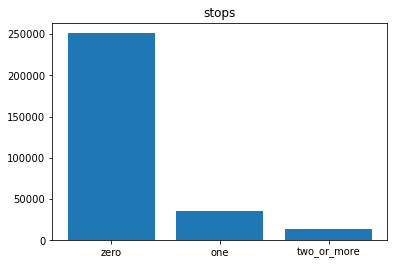

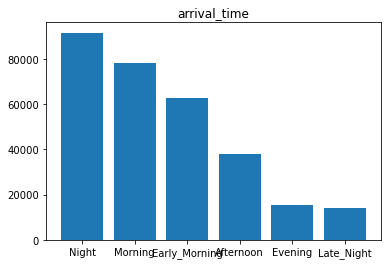

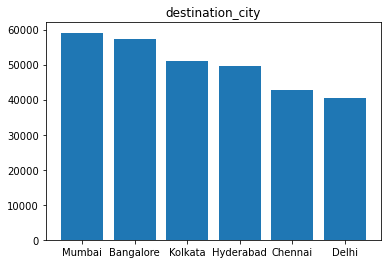

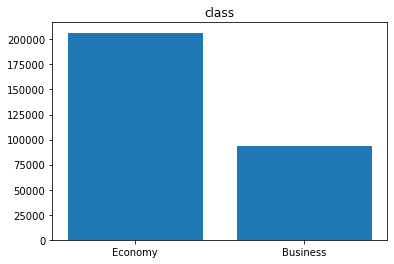

In [92]:
for i in categorical_data:
    plt.figure()
    plt.bar(x=dataset[i].unique(), height=dataset[i].value_counts())
    plt.title(i)

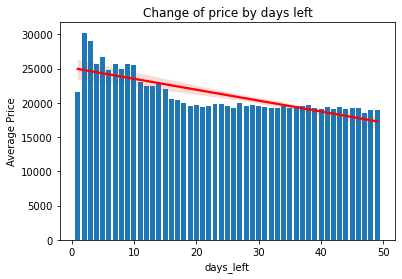

In [94]:
grouped_airlines_by_days_left = dataset.groupby('days_left')['price'].mean()
plt.bar(grouped_airlines_by_days_left.index, grouped_airlines_by_days_left.values)
plt.title("Change of price by days left")
plt.xlabel("Number of days left")
plt.ylabel("Average Price")
sns.regplot(x = grouped_airlines_by_days_left.index, y = grouped_airlines_by_days_left.values, color ='red', scatter=False)
plt.show()

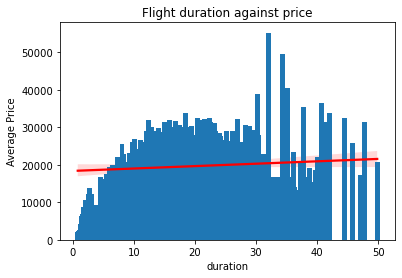

In [96]:
grouped_airlines_by_duration = dataset.groupby('duration')['price'].mean()
plt.bar(grouped_airlines_by_duration.index, grouped_airlines_by_duration.values)
plt.title("Flight duration against price")
plt.xlabel("Duration of flight")
plt.ylabel("Average Price")
sns.regplot(x = grouped_airlines_by_duration.index, y = grouped_airlines_by_duration.values, color ='red', scatter=False)
plt.show()

In [52]:
# ASSIGNING NUMERIC VLAUES TP CATEGORICAL DATA FOR CALCULATIONS

data = dataset.copy()
data['airline'] = pd.factorize(data['airline'])[0]
data['flight'] = pd.factorize(data['flight'])[0]
data['source_city'] = pd.factorize(data['source_city'])[0]
data['departure_time'] = pd.factorize(data['departure_time'])[0]
data['stops'] = pd.factorize(data['stops'])[0]
data['arrival_time'] = pd.factorize(data['arrival_time'])[0]
data['destination_city'] = pd.factorize(data['destination_city'])[0]
data['class'] = pd.factorize(data['class'])[0]

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [104]:
x = data[['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class','duration', 'days_left']]
# where X is independent valriable
y = data['price']

In [58]:
x1 = sm.add_constant(x)
result = sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.812e+05
Date:                Fri, 17 Jun 2022   Prob (F-statistic):               0.00
Time:                        01:22:29   Log-Likelihood:            -3.0854e+06
No. Observations:              300153   AIC:                         6.171e+06
Df Residuals:                  300142   BIC:                         6.171e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6593.9469     61.950    106.439      0.000    6472.526    6715.368
airline           -809.2381      8.891    -91.018      0.000    -826.664    -791.812
flight              -0.2879      0.084     -3.414      0.001      -0.453      -0.123
source_city        276.4641     23.154     11.940      0.000     231.083     321.846
departure_time     -80.5055      9.384     -8.579      0.000     -98.898     -62.113
stops             5924.0986     36.785    161.047      0.000    5852.001    5996.196
arrival_time       -28.2392      7.428     -3.802      0.000     -42.798     -13.680
destination_city  -275.6988      7.301    -37.759      0.000    -290.009    -261.388
class             4.571e+04     28.294   1615.396      0.000    4.57e+04    4.58e+04
duration            78.8682      2.065     38.202      0.000      74.822      82.915
days_left         -131.1689      0.950   -138.110      0.000    -133.030    -129.307
==============================================================================
Omnibus:                    36193.417   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336341.858
Skew:                           0.227   Prob(JB):                         0.00
Kurtosis:                       8.166   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since all variable P value is less than 0.05 therefore we can say that all attributes are significant variables that contribute significantly in predicting the output.

# TRAINING AND TESTING 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [105]:
def accuracy(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=11)
    model.fit(x_train,y_train)
    print('Accuracy is', model.score(x_test, y_test)*100)
    
    score = cross_val_score(model, x, y, cv=5)
    print('Cross validation score is', np.mean(score)*100)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

accuracy(model,x,y)  #This predicts that our model prediction is % accurate

print('---Linear Regression---')
test_pred = model.predict(x_test) # predicting test data
train_pred = model.predict(x_train) # predicting train data

print("Model Intercept", model.intercept_)
print("Model Score on train data", (r2_score(y_train, train_pred)*100),'%')
print("Model Score on test data", ((r2_score(y_test,test_pred)*100)),'%')

Accuracy is 90.36311499102246
Cross validation score is 4.321944662552914
---Linear Regression---
Model Intercept 6549.52537912715
Model Score on train data 90.35550408405925 %
Model Score on test data 90.36311499102246 %



From the results above, we can tell that the model hasn't over fitted because there is very little difference 
beteen the scores on the test data and train data.

Wth this model we can predicy the price for future flights given we have all the related details ablout flight i.e categorical data.

In [120]:
r2 = r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')
print ("R^2 is",r2)

# It is the amount of the variation in the output dependent attribute which is predictable from the input independent 
# variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of 
# total deviation of results described by the model.

R^2 is 0.9036311499102245
